# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Variables

In [2]:
N_FEATURES_LIST = [1, 3, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 94]

MUTUAL_INFORMATION = "MUTUAL_INFORMATION"
SPEARMAN = "SPEARMAN"
ONE_R = "ONE_R"

FEATURE_SELECTION_LIST = [MUTUAL_INFORMATION, SPEARMAN, ONE_R]

CLASSIFIERS = "Classifiers"
ACCURACY = "Accuracy"
N_FEATURES_NAME = "N_Features"
FEATURE_SELECTION = "Feature_Selection"
DIVERSITY = "Diversity"
FUSION_CLASSIFIER = "Fusion"


### Variables file

In [3]:
REAL_RETURN = "Real Return"
RISK = "Risk"

UNIQUE_CLASSIFIERS = "######## CLASSIFICADORES UNICOS ########"
CV = "######## CV ########"
SELECTION_CLASSIFIERS = "######## CLASSIFIERS SELECTION ########"
WHITOUT_DIVERSITY = "######## WHITOUT DIVERSITY ########"
BAGGING = "######## BAGGING ########"
ADABOOST = "######## ADABOOST ########"
FUSION = "######## FUSION ########"
END = "END"

RANDOM_FOREST = "RANDOM FOREST"
SVM = "SVM"
DECISION_TREE = "DECISION TREE"
NAIVE_BAYES = "NAIVE BAYES"
NEURAL_NETWORK = "NEURAL NETWORK"
LOGISTIC_REGRESSION = "LOGISTIC REGRESSION"
KNEIGHBORS= "KNEIGHBORS"
XGBOOST = "XGBOOST"

CLASSIFIER_LIST = [RANDOM_FOREST, SVM, DECISION_TREE, NAIVE_BAYES, NEURAL_NETWORK, LOGISTIC_REGRESSION, KNEIGHBORS, XGBOOST]

## Create Dataframes

In [4]:
UNIQUE_COLUMNS = [N_FEATURES_NAME, FEATURE_SELECTION, CLASSIFIERS, ACCURACY]
DF_UNIQUE_REAL_RETURN = pd.DataFrame(columns=UNIQUE_COLUMNS)
DF_UNIQUE_RISK = pd.DataFrame(columns=UNIQUE_COLUMNS)

FUSION_COLUMNS = [N_FEATURES_NAME, DIVERSITY, FUSION_CLASSIFIER, ACCURACY]
DF_FUSION_REAL_RETURN = pd.DataFrame(columns=FUSION_COLUMNS)
DF_FUSION_RISK = pd.DataFrame(columns=FUSION_COLUMNS)

## Read File

In [5]:
def addUniqueClassifiers(n_features:int, method:str, unique_classifiers:pd.DataFrame):
  global DF_UNIQUE_REAL_RETURN
  global DF_UNIQUE_RISK
  
  for key in unique_classifiers.keys():
    row_result = [n_features, method, key, unique_classifiers[key][0]]
    row_risk = [n_features, method, key, unique_classifiers[key][1]]

    temp_df = pd.DataFrame([row_result], columns=DF_UNIQUE_REAL_RETURN.columns)
    DF_UNIQUE_REAL_RETURN = pd.concat([DF_UNIQUE_REAL_RETURN, temp_df], ignore_index=True)

    temp_df = pd.DataFrame([row_risk], columns=DF_UNIQUE_RISK.columns)
    DF_UNIQUE_RISK = pd.concat([DF_UNIQUE_RISK, temp_df], ignore_index=True)

In [6]:
def addFusion(n_features:int, fusion_list:list, df_base:pd.DataFrame):
  for result in fusion_list:
    row = [n_features, 
           str(result[0]).replace("[", "").replace("]", ""),  
           str(result[1]).replace("[", "").replace("]", ""),
           result[2]]
    
    temp_df = pd.DataFrame([row], columns=df_base.columns)
    df_base = pd.concat([df_base, temp_df], ignore_index=True)

  return df_base

In [7]:
def readFile(selection_feature:str, n_features:int):
  global DF_FUSION_REAL_RETURN
  global DF_FUSION_RISK

  FILE_PATH = f"./files/{selection_feature}_{n_features}.txt"
  file = open(FILE_PATH, 'r')

  unique_classifiers = {}
  cv_classifiers = {}

  real_return_whiout = []
  risk_whiout = []

  real_return_bagging = []
  risk_bagging = []

  real_return_adaboost = []
  risk_adaboost = []

  real_return_fusion = []
  risk_fusion = []

  for line in file:
    if UNIQUE_CLASSIFIERS in line:
      line = file.readline()
      while CV not in line:
        line = line.strip()
        classifier = line.split(":")
        if classifier.__len__() > 1:
          unique_classifiers[classifier[0]] = eval(classifier[1])
        line = file.readline()
    if CV in line:
      line = file.readline()
      while SELECTION_CLASSIFIERS not in line:
        line = line.strip()
        line = file.readline()
    if WHITOUT_DIVERSITY in line:
      line = file.readline()
      while BAGGING not in line:
        line = line.strip()
        bg = line.split(": ")
        if bg.__len__() > 1 and bg[0] == REAL_RETURN:
          real_return_whiout.append(bg[1].split(', '))
        if bg.__len__() > 1 and bg[0] == RISK:
          risk_whiout.append(bg[1].split(', '))
        line = file.readline()
    if BAGGING in line:
      line = file.readline()
      while ADABOOST not in line:
        line = line.strip()
        bg = line.split(": ")
        if bg.__len__() > 1 and bg[0] == REAL_RETURN:
          real_return_bagging.append(bg[1].split(', '))
        if bg.__len__() > 1 and bg[0] == RISK:
          risk_bagging.append(bg[1].split(', '))
        line = file.readline()
    if ADABOOST in line:
      line = file.readline()
      while FUSION not in line:
        line = line.strip()
        bg = line.split(": ")
        if bg.__len__() > 1 and bg[0] == REAL_RETURN:
          real_return_adaboost.append(bg[1].split(', '))
        if bg.__len__() > 1 and bg[0] == RISK:
          risk_adaboost.append(bg[1].split(', '))
        line = file.readline()
    if FUSION in line:
      line = file.readline()
      while END not in line:
        line = line.strip().replace(":", "").split(" ")
        if line.__len__() > 1 and line[2] == "RealReturn":
          real_return_fusion.append((line[0], line[1], line[3]))
        if line.__len__() > 1 and line[2] == "Risk":
          risk_fusion.append((line[0], line[1], line[3]))
        line = file.readline()

  addUniqueClassifiers(n_features, selection_feature, unique_classifiers)
  DF_FUSION_REAL_RETURN = addFusion(n_features, real_return_fusion, DF_FUSION_REAL_RETURN)

In [8]:
def queryByColumn(df:pd.DataFrame, column:str, value:str):
  return df[df[column] == value]

In [9]:
for f_selection in FEATURE_SELECTION_LIST:
  for features in N_FEATURES_LIST:
    readFile(f_selection, features)

In [10]:
def plot_accuracy(df, type):
  # Cria um gráfico para cada classificador
  for classifier in CLASSIFIER_LIST:
    # Filtre o dataframe pelo classificador atual
    df_classifier = df[df[CLASSIFIERS] == classifier]

    # Crie um novo gráfico
    plt.figure()

    # Plote as linhas para cada FEATURE_SELECTION
    for feature_selection in df_classifier[FEATURE_SELECTION].unique():
      df_selection = df_classifier[df_classifier[FEATURE_SELECTION] == feature_selection]
      plt.plot(df_selection[N_FEATURES_NAME], df_selection[ACCURACY], label=feature_selection)

    # Configure os eixos X e Y
    plt.xlabel('Número de Features')
    plt.ylabel('Acurácia')

    # Configure o título do gráfico
    title = f'{type} - Classificador: {classifier}'
    plt.title(title)

    # Adicione uma legenda
    plt.legend()

    # Adicione um grid
    plt.grid(color='gray', linestyle=':', linewidth=0.5)
    plt.xticks(range(0, df[N_FEATURES_NAME].max()+1, 5))
    plt.savefig(f'./images/{type}_{classifier}.png')

  # Exiba todos os gráficos
  plt.show()


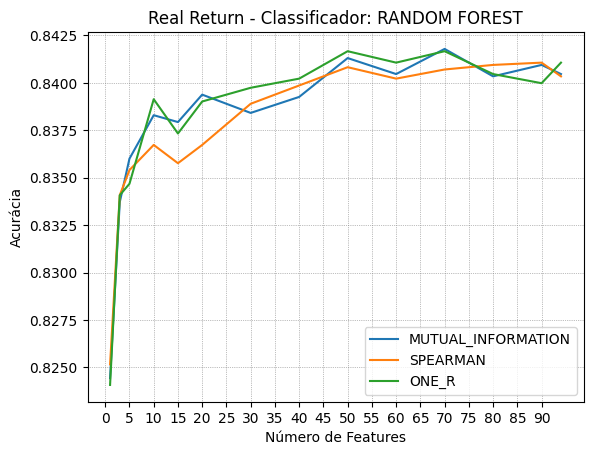

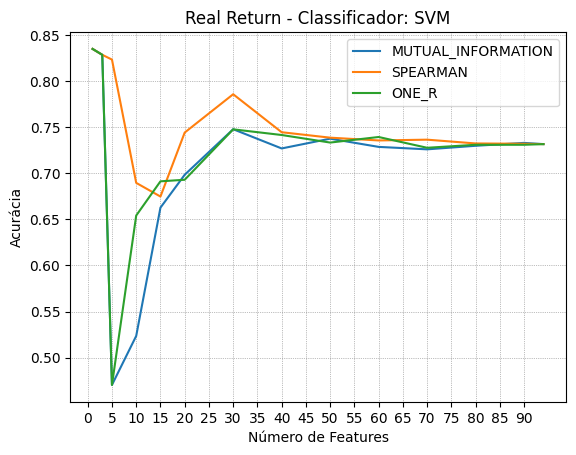

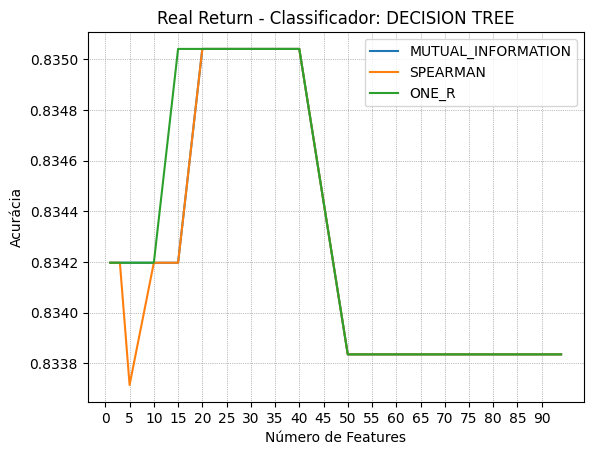

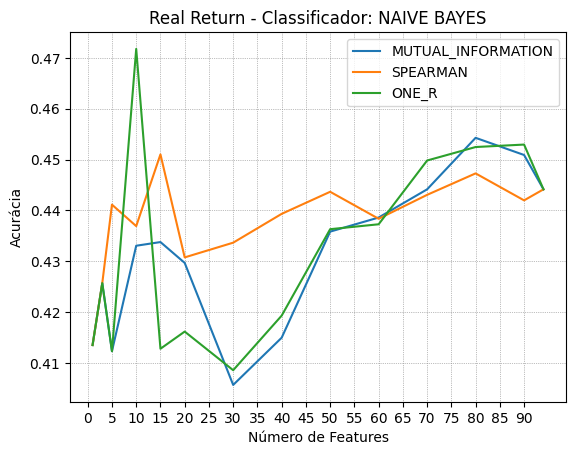

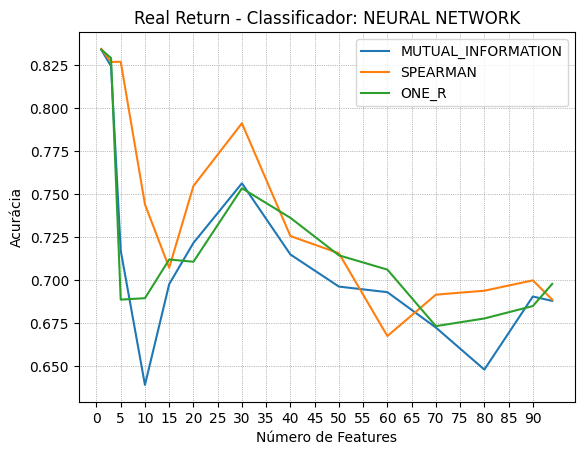

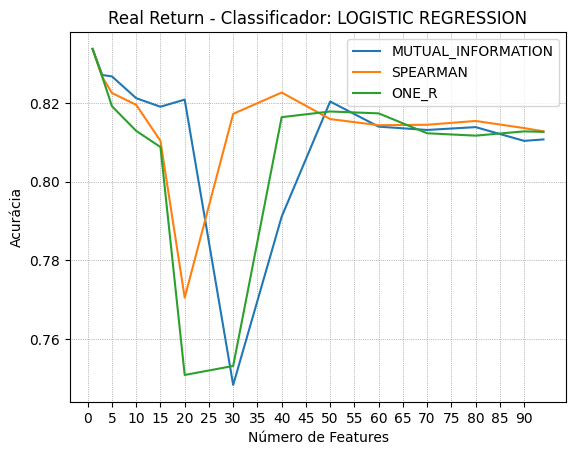

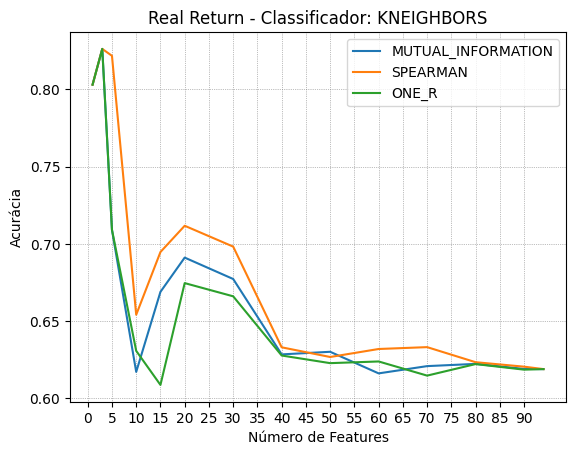

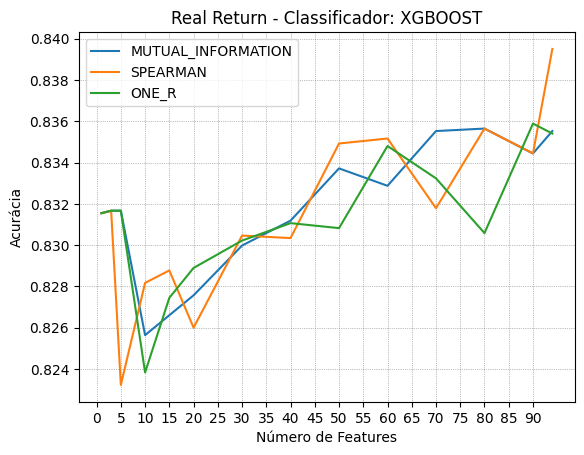

In [11]:
plot_accuracy(DF_UNIQUE_REAL_RETURN, REAL_RETURN)

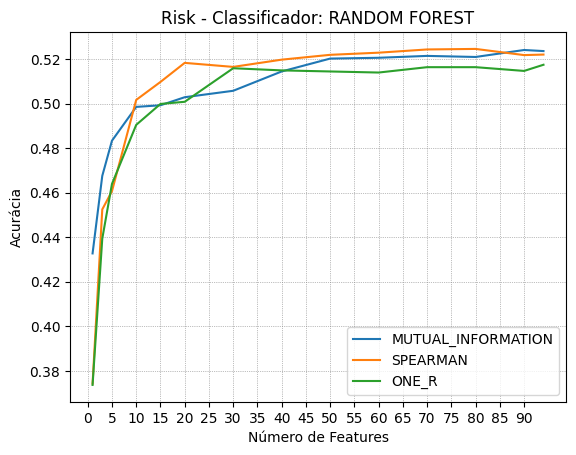

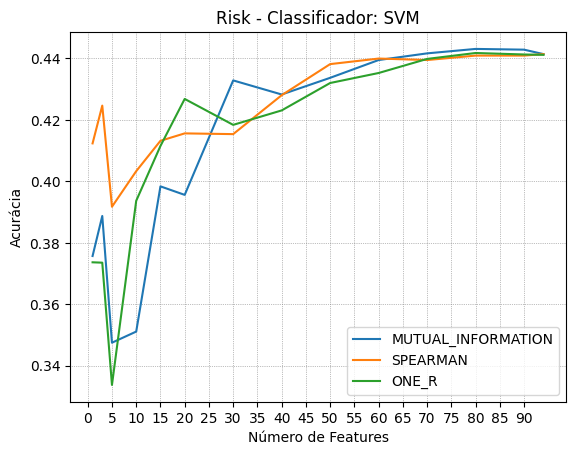

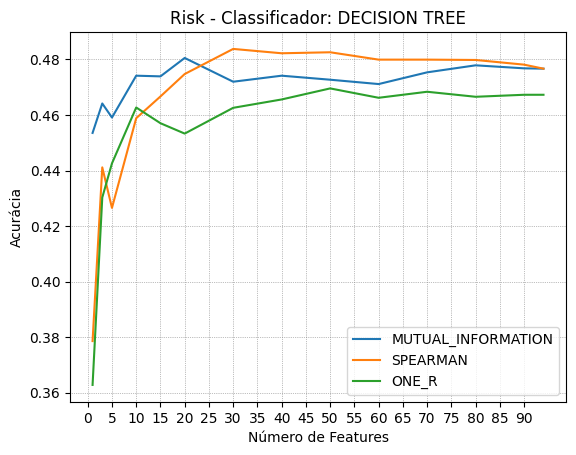

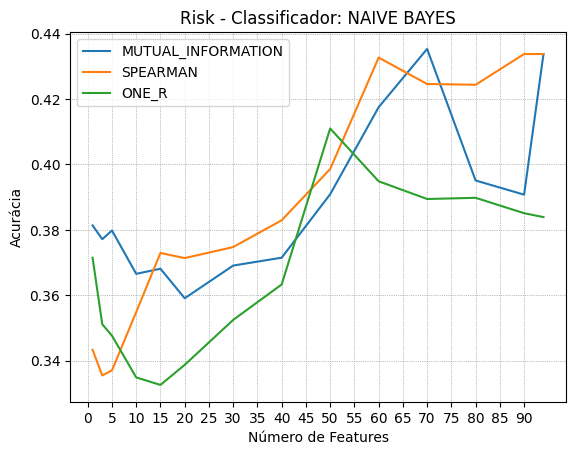

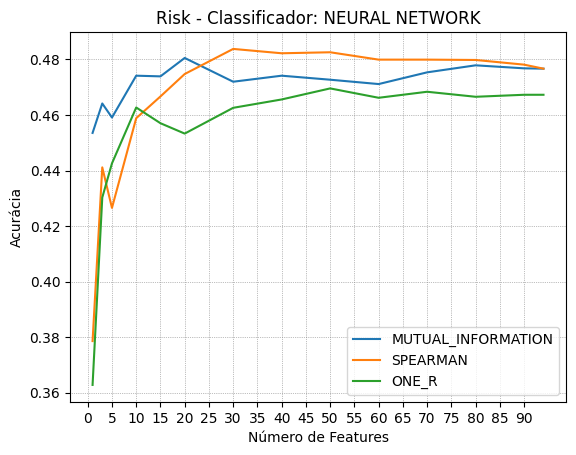

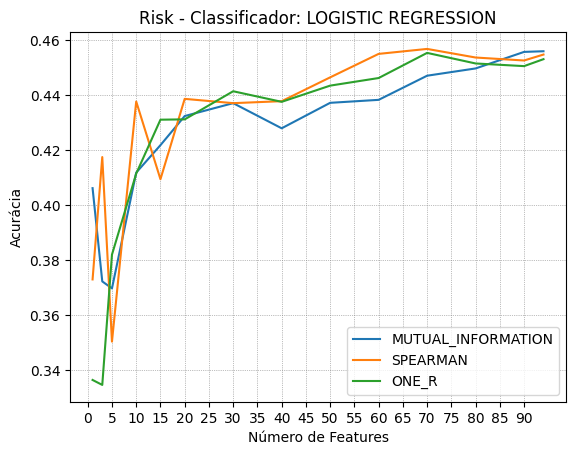

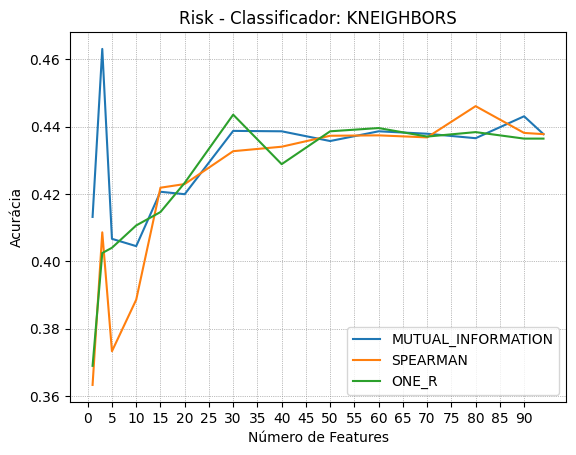

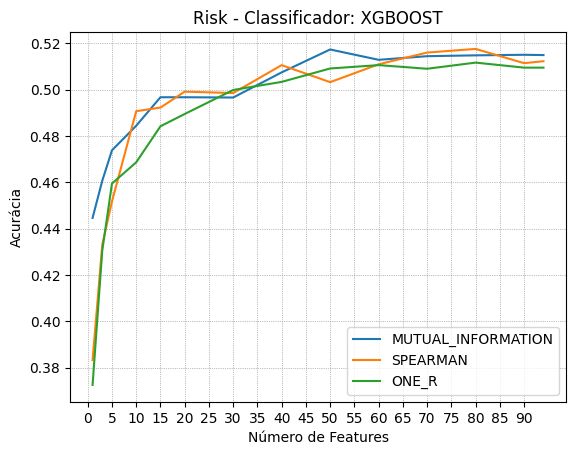

In [12]:
plot_accuracy(DF_UNIQUE_RISK, RISK)

In [13]:
DF_UNIQUE_REAL_RETURN

,N_Features,Feature_Selection,Classifiers,Accuracy
0,1,MUTUAL_INFORMATION,RANDOM FOREST,0.824437
1,1,MUTUAL_INFORMATION,SVM,0.834920
2,1,MUTUAL_INFORMATION,DECISION TREE,0.834197
3,1,MUTUAL_INFORMATION,NAIVE BAYES,0.413544
4,1,MUTUAL_INFORMATION,NEURAL NETWORK,0.834076
...,...,...,...,...
331,94,ONE_R,NAIVE BAYES,0.444150
332,94,ONE_R,NEURAL NETWORK,0.697795
333,94,ONE_R,LOGISTIC REGRESSION,0.812628
334,94,ONE_R,KNEIGHBORS,0.618990


In [14]:
DF_UNIQUE_REAL_RETURN.sort_values(ACCURACY, ascending=False)

,N_Features,Feature_Selection,Classifiers,Accuracy
80,70,MUTUAL_INFORMATION,RANDOM FOREST,0.841788
304,70,ONE_R,RANDOM FOREST,0.841668
288,50,ONE_R,RANDOM FOREST,0.841668
64,50,MUTUAL_INFORMATION,RANDOM FOREST,0.841306
328,94,ONE_R,RANDOM FOREST,0.841065
...,...,...,...,...
259,15,ONE_R,NAIVE BAYES,0.412821
19,5,MUTUAL_INFORMATION,NAIVE BAYES,0.412339
243,5,ONE_R,NAIVE BAYES,0.412339
275,30,ONE_R,NAIVE BAYES,0.408603


In [15]:
DF_UNIQUE_RISK.sort_values(ACCURACY, ascending=False)

,N_Features,Feature_Selection,Classifiers,Accuracy
200,80,SPEARMAN,RANDOM FOREST,0.524521
192,70,SPEARMAN,RANDOM FOREST,0.524280
96,90,MUTUAL_INFORMATION,RANDOM FOREST,0.524039
104,94,MUTUAL_INFORMATION,RANDOM FOREST,0.523557
184,60,SPEARMAN,RANDOM FOREST,0.522834
...,...,...,...,...
123,3,SPEARMAN,NAIVE BAYES,0.335462
251,10,ONE_R,NAIVE BAYES,0.334860
237,3,ONE_R,LOGISTIC REGRESSION,0.334498
241,5,ONE_R,SVM,0.333775
